<a id="0"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:20px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>Customer Segmentation and Behavioral Analysis of Online Retail Shoppers Using K-means Clustering </b></div>

<div style="text-align: center;">
    <img src="https://t4.ftcdn.net/jpg/10/77/68/47/240_F_1077684785_vUnyJSGLZATjOTP1DXX1t1oiO3IRcQgA.jpg" alt="alzheimers" style="width:100%; height:auto; border-radius: 10px;">
</div>
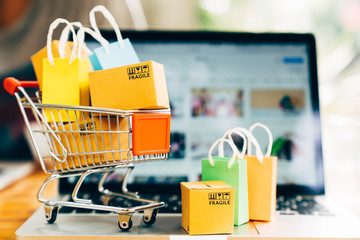
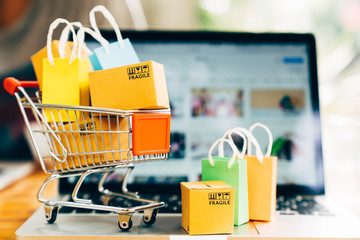

<h2>Summary 📝</h2>
<div style="padding: 20px; border-color: #2e86c1; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid DodgerBlue;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>This project demonstrates customer segmentation in retail using unsupervised learning with the K-Means clustering algorithm.</li>
        <li>We preprocess the data, clean missing values, and engineer RFM (Recency, Frequency, Monetary) features to represent customer behavior.</li>
        <li>The model groups customers into distinct segments to help businesses target marketing strategies effectively.</li>
        <li>This approach can improve customer retention and increase sales through personalized engagement.</li>
    </ul>
</div>


<a id="Contents"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:black; overflow:hidden"><b> Table of Contents </b></div>

- <a href="#1">1. Introduction</a>
- <a href="2">2. Data Understanding and Preprocessing</a>
    - <a href="2.1">2.1. Importing Libraries</a>
    - <a href="#2.2">2.2. Loading Dataset</a>
    - <a href="#2.3">2.3. Handling Missing Values</a>
    - <a href="#2.4">2.4. Exploratory Data Analysis (EDA)</a>
    - <a href="#2.5">2.5. Feature Engineering (RFM Calculation)</a>
    - <a href="#2.6">2.6. Data Normalization</a>
- <a href="#3">3. Customer Segmentation Using K-Means</a>
    - <a href="#3.1">3.1. Elbow Method (WCSS Plot)</a>
    - <a href="#3.2">3.2. Applying K-Means Clustering</a>
- <a href="#4">4. Visualization and insights</a>
    - <a href="#4.1">4.1. Pairplot Visualization</a>
    - <a href="#4.1">4.2 Visualization of clusters(Scatterplot)</a>
    - <a href="#4.1">4.3. Customer Segments by PCA</a>
    - <a href="#4.1">4.1. Cluster Profiling</a>
- <a href="#5">5. Conclusion and Analysis of Customer Segmentation</a>


<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:black; overflow:hidden"><b>1. Introduction</b></div>



<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>
            In this project, we perform customer segmentation using the RFM (Recency, Frequency, Monetary) analysis technique along with K-Means clustering.
        </li>
        <li>
            The goal is to understand customer behavior by analyzing transaction data and grouping customers into meaningful segments.
        </li>
        <li>
            We also discuss data preprocessing steps, feature engineering, normalization, clustering, and visualization to derive actionable business insights.
        </li>
    </ul>
</div>


<a id="2"></a>

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:black; overflow:hidden"><b>2. Data Understanding and Preprocessing</b></div>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;"> <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;"> <li> The dataset contains online retail transactional data including <b>InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID</b>, and <b>Country</b>. </li> <li> We begin with data cleaning steps such as removing <b>null entries</b>, <b>negative or zero values</b> in Quantity and UnitPrice, and <b>duplicate records</b>. </li> <li> Feature engineering is performed to derive the <b>TotalAmount</b> from Quantity and UnitPrice. </li> <li> The <b>InvoiceDate</b> is converted to datetime format, and a <b>reference date</b> is set for recency calculation. </li> <li> The data is then grouped by CustomerID to compute <b>Recency</b>, <b>Frequency</b>, and <b>Monetary</b> values, forming the basis of RFM analysis. </li> </ul> </div>

<a id="2.1"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>2.1. Importing Libraries 📚</b></div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

<a id="2.2"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>2.2. Loading Dataset</b></div>


In [2]:
data = pd.read_excel('/kaggle/input/customer-segmentation-dataset/Online Retail.xlsx')

print(data.head(5))


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


<a id="2.3"></a>

## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>2.3. Handling Missing Values</b></div>

In [3]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
data = data.dropna(subset=['CustomerID'])
data['CustomerID'] = data['CustomerID'].astype(int)  # Optional: convert to int


<a id="2.4"></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>2.4. Exploratory Data Analysis (EDA)</b></div>


In [5]:
data.shape

(406829, 8)

In [6]:
data.size

3254632

In [7]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207168,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB
None


<a id="2.5"></a>

## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>2.5. Feature Engineering (RFM Calculation)</b></div>


In [9]:
data['TotalAmount'] = data['Quantity'] * data['UnitPrice']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalAmount': 'sum'                                       # Monetary
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
print(rfm.head())


   CustomerID  Recency  Frequency  Monetary
0       12346      326          2      0.00
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40


<a id="2.6"></a>

## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>2.6. Data Normalization</b></div>


In [10]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])


<a id="3"></a>

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:black; overflow:hidden"><b>3. Customer Segmentation Using K-Means</b></div>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;"> <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;"> <li> To find the optimal number of clusters, the <b>Within-Cluster Sum of Squares (WCSS)</b> is calculated for different values of k using the <b>Elbow Method</b>. </li> <li> The plot of WCSS vs. number of clusters helps identify the 'elbow point', which indicates a suitable number of clusters to balance model complexity and performance. </li> <li> Based on the elbow method, K-Means clustering is applied with the chosen number of clusters (e.g., k=5). </li> <li> The K-Means model assigns each customer to one of the clusters, which are added as a new column <b>'Cluster'</b> in the RFM dataframe. </li> <li> Cluster sizes are checked to ensure reasonable distribution across groups. </li> </ul> </div>

<a id="3.1"></a>

## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>3.1. Elbow Method (WCSS Plot)</b></div>

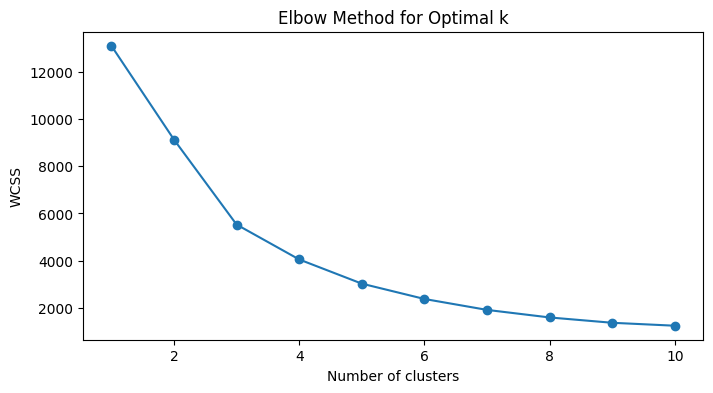

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


<a id="3.2"></a>

## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>3.2. Applying K-Means Clustering</b></div>

In [12]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)


In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(rfm_scaled)

# Add cluster labels to RFM table
rfm['Cluster'] = kmeans.labels_

# Check cluster sizes
print(rfm['Cluster'].value_counts())


Cluster
4    2919
0    1063
1     365
3      22
2       3
Name: count, dtype: int64


<a id="4"></a>

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:black; overflow:hidden"><b>4. Visualization and Insights</b></div>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;"> <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;"> <li> <b>Pairplot:</b> Visualizes relationships between the scaled RFM features colored by clusters to observe how clusters separate across Recency, Frequency, and Monetary metrics. </li> <li> <b>Scatter Plot (Recency vs. Monetary):</b> Displays customer segments using Recency and Monetary values, with different colors representing cluster assignments. </li> <li> <b>Customer Segments by PCA:</b> Dimensionality reduction via PCA reduces the scaled RFM features to two principal components for easier visualization of cluster separation in 2D space. </li> <li> <b>Cluster Profiling:</b> Provides the average values of Recency, Frequency, and Monetary metrics per cluster to interpret characteristics and behavior of each customer segment. </li> </ul> </div>

<a id="4.1"></a>

## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>4.1. Pairplot Visualization</b></div>

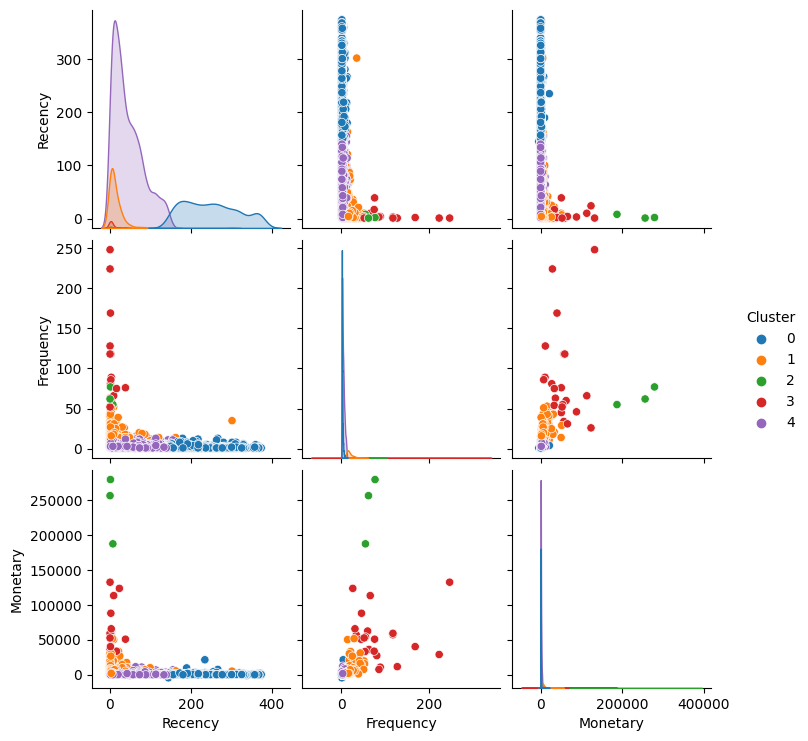

In [14]:
sns.pairplot(rfm, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'], palette='tab10')
plt.show()


<a id="4.2"></a>

## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>4.2 Visualization of clusters(Scatterplot)</b></div>

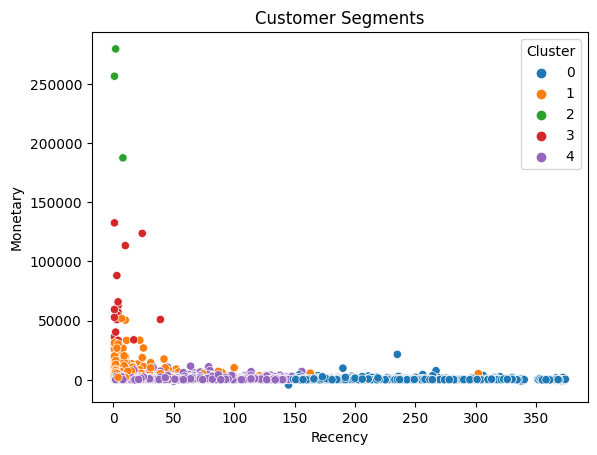

In [15]:
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='tab10')
plt.title('Customer Segments')
plt.show()


<a id="4.3"></a>

## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>4.3. Customer Segments by PCA</b></div>

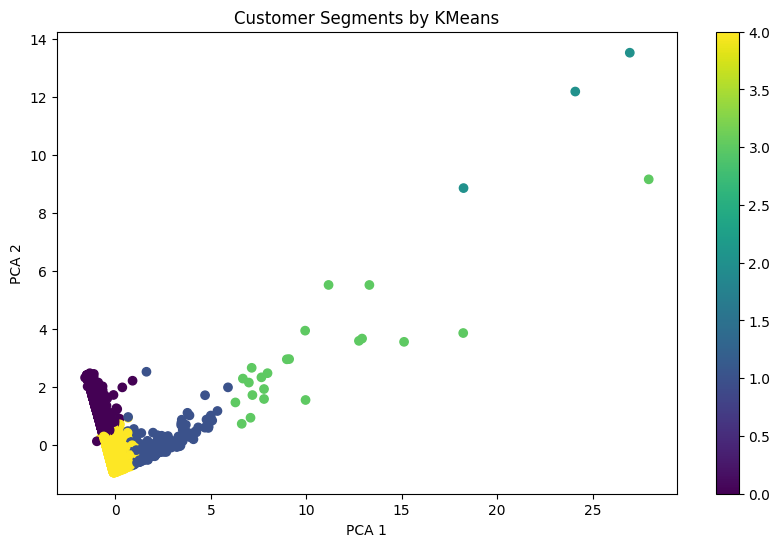

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(rfm_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(components[:, 0], components[:, 1], c=rfm['Cluster'], cmap='viridis')
plt.title('Customer Segments by KMeans')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()


<a id="4.3"></a>

## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:black; overflow:hidden"><b>4.4 Cluster Profiling</b></div>

In [17]:
print(rfm.groupby('Cluster').mean())


           CustomerID     Recency  Frequency       Monetary
Cluster                                                    
0        15354.211665  250.284102   1.799624     454.581384
1        15186.306849   14.849315  19.652055    7095.058137
2        16732.666667    3.666667  64.666667  241136.560000
3        14888.090909    6.181818  88.363636   54540.575909
4        15295.623844   44.813635   3.756766    1131.842149


<a id="5"></a>

# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:black; overflow:hidden"><b>5. Conclusion and Analysis of Customer Segmentation</b></div>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid RoyalBlue;"> <p style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;"> The customer segmentation using RFM analysis combined with K-Means clustering has successfully grouped customers into five distinct clusters with varied purchasing behaviors. By analyzing the mean values of Recency, Frequency, and Monetary metrics for each cluster, the following interpretations and insights were derived: </p> <table style="width:100%; border-collapse: collapse; font-family: Arial; font-size: 16px; margin-bottom: 20px;"> <thead> <tr style="background-color: #0d47a1; color: white;"> <th style="padding: 8px; border: 1px solid #ddd;">Cluster</th> <th style="padding: 8px; border: 1px solid #ddd;">Recency (days)</th> <th style="padding: 8px; border: 1px solid #ddd;">Frequency (purchases)</th> <th style="padding: 8px; border: 1px solid #ddd;">Monetary (total spend)</th> <th style="padding: 8px; border: 1px solid #ddd;">Interpretation</th> </tr> </thead> <tbody> <tr> <td style="padding: 8px; border: 1px solid #ddd;">0</td> <td style="padding: 8px; border: 1px solid #ddd;">250.28</td> <td style="padding: 8px; border: 1px solid #ddd;">1.80</td> <td style="padding: 8px; border: 1px solid #ddd;">454.58</td> <td style="padding: 8px; border: 1px solid #ddd;"> <b>Inactive/At-risk customers:</b> High recency (not purchased recently), low frequency and monetary value. They may be targeted for re-engagement campaigns to reduce churn. </td> </tr> <tr style="background-color: #f0f0f0;"> <td style="padding: 8px; border: 1px solid #ddd;">1</td> <td style="padding: 8px; border: 1px solid #ddd;">14.85</td> <td style="padding: 8px; border: 1px solid #ddd;">19.65</td> <td style="padding: 8px; border: 1px solid #ddd;">7095.06</td> <td style="padding: 8px; border: 1px solid #ddd;"> <b>Loyal customers:</b> Frequent buyers with low recency and moderately high spending. Worth rewarding to maintain loyalty. </td> </tr> <tr> <td style="padding: 8px; border: 1px solid #ddd;">2</td> <td style="padding: 8px; border: 1px solid #ddd;">3.67</td> <td style="padding: 8px; border: 1px solid #ddd;">64.67</td> <td style="padding: 8px; border: 1px solid #ddd;">241136.56</td> <td style="padding: 8px; border: 1px solid #ddd;"> <b>Top customers:</b> Very recent buyers with very high frequency and monetary value. Represent the most valuable segment, ideal for VIP treatment. </td> </tr> <tr style="background-color: #f0f0f0;"> <td style="padding: 8px; border: 1px solid #ddd;">3</td> <td style="padding: 8px; border: 1px solid #ddd;">6.18</td> <td style="padding: 8px; border: 1px solid #ddd;">88.36</td> <td style="padding: 8px; border: 1px solid #ddd;">54540.58</td> <td style="padding: 8px; border: 1px solid #ddd;"> <b>High frequency, high spender segment:</b> Highly engaged customers with considerable spending, suitable for upselling and premium promotions. </td> </tr> <tr> <td style="padding: 8px; border: 1px solid #ddd;">4</td> <td style="padding: 8px; border: 1px solid #ddd;">44.81</td> <td style="padding: 8px; border: 1px solid #ddd;">3.76</td> <td style="padding: 8px; border: 1px solid #ddd;">1131.84</td> <td style="padding: 8px; border: 1px solid #ddd;"> <b>Moderate spenders:</b> Moderate recency and low frequency with reasonable spending. They could be encouraged to purchase more frequently. </td> </tr> </tbody> </table>


<p style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    Overall, the segmentation provides a clear view of customer purchasing patterns, enabling targeted marketing strategies:
</p>
<ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    <li>Clusters 2 and 3 represent the most valuable customers contributing major revenue; focus on retention and VIP programs.</li>
    <li>Cluster 0 contains customers at risk of churn; prioritize re-engagement efforts.</li>
    <li>Clusters 1 and 4 include loyal and moderate customers who can be nurtured to increase purchase frequency and value.</li>
    <li>Visualizations validate distinct separations among clusters, confirming model effectiveness.</li>
</ul>
<p style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
    This segmentation model provides actionable insights for personalized marketing, customer retention, and resource allocation to maximize business value.
</p>
</div>





